#### Overfitting and Underfitting

Three ways to overcome Overfitting

1.Regularization Hyperparameter

2.Cross Validation

3.Bias-Variance trade of

Bias : Difference between average prediction and the correct value which we are trying to predict.

Variance: It's the change in the amount of estimate of the target function on changing the training dataset.

High Bias : Underfitting

High Variance : Overfitting

Low Bias, High Variance : Decision Tree, Simple Vector Machine and K-Nearest Neighbors

High Bias, Low Variance: Linear Regression, Linear Discriminant Analysis and Logistic Regression

#### Regularization

#### Lasso Regression without Regularization

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_data = pd.read_csv('Detail_Cars.csv')

df_data = df_data.replace('?',np.nan)

df_data.select_dtypes(include=['float','int'])

df_data['price'] = pd.to_numeric(df_data['price'], errors='coerce')
df_data['horsepower'] = pd.to_numeric(df_data['horsepower'], errors='coerce')
df_data['bore'] = pd.to_numeric(df_data['bore'], errors='coerce')
df_data['stroke'] = pd.to_numeric(df_data['stroke'], errors='coerce')
df_data['peak-rpm'] = pd.to_numeric(df_data['peak-rpm'], errors='coerce')

cylin_dict = {'two': 2, 'three': 3, 'four':4, 'five':5 , 'six':6, 'eight':8, 'twelve':12}

df_data['num-of-cylinders'].replace(cylin_dict, inplace=True)

df_data = df_data.drop('normalized-losses', axis=1)

df_data = pd.get_dummies(df_data)

df_data = df_data.dropna()


X = df_data.drop('price', axis=1)

y = df_data['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

model_linear.score(X_train, y_train)

0.967922737092433

In [10]:
y_predict = model_linear.predict(X_test)

r_square_pre = model_linear.score(X_test, y_test)
print(r_square_pre)

0.6322583416118102


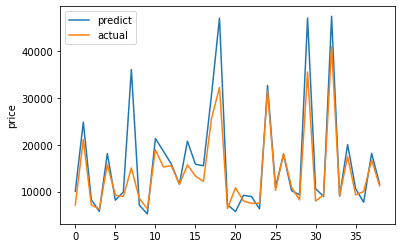

In [11]:
#Graph shows overfitting
plt.plot(y_predict, label='predict')
plt.plot(y_test.values, label='actual')
plt.ylabel('price')
plt.legend()
plt.show()

bore               -17504.434184
make_peugot         -8402.769583
fuel-type_gas       -6066.159660
make_plymouth       -5259.330848
make_isuzu          -4742.838945
                        ...     
fuel-system_idi      6066.159660
fuel-type_diesel     6066.159660
make_bmw             6865.659076
make_saab            8360.429269
make_porsche        10471.326516
Length: 68, dtype: float64


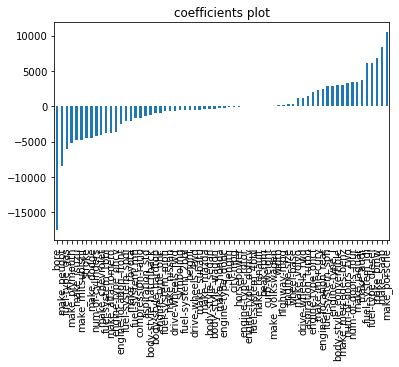

In [12]:
feature_col = X_train.columns
coef_val = pd.Series(model_linear.coef_, feature_col).sort_values()
print(coef_val)

#Bar Coef Plot
coef_val.plot(kind='bar', title='coefficients plot')

#### Lasso Regression

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_data = pd.read_csv('Detail_Cars.csv')

df_data = df_data.replace('?',np.nan)

df_data.select_dtypes(include=['float','int'])

df_data['price'] = pd.to_numeric(df_data['price'], errors='coerce')
df_data['horsepower'] = pd.to_numeric(df_data['horsepower'], errors='coerce')
df_data['bore'] = pd.to_numeric(df_data['bore'], errors='coerce')
df_data['stroke'] = pd.to_numeric(df_data['stroke'], errors='coerce')
df_data['peak-rpm'] = pd.to_numeric(df_data['peak-rpm'], errors='coerce')

cylin_dict = {'two': 2, 'three': 3, 'four':4, 'five':5 , 'six':6, 'eight':8, 'twelve':12}

df_data['num-of-cylinders'].replace(cylin_dict, inplace=True)

df_data = df_data.drop('normalized-losses', axis=1)

df_data = pd.get_dummies(df_data)

df_data = df_data.dropna()


X = df_data.drop('price', axis=1)

y = df_data['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# This is Lasso application

from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha = 0.5, normalize=True)
model_lasso.fit(X_train, y_train)

model_lasso.score(X_train, y_train)

0.9651081272527551

In [15]:
y_predict = model_lasso.predict(X_test)

r_square_lasso = model_lasso.score(X_test, y_test)
print(r_square_lasso)

0.8871949534448481


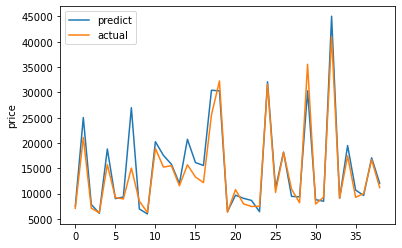

In [16]:
#Graph
plt.plot(y_predict, label='predict')
plt.plot(y_test.values, label='actual')
plt.ylabel('price')
plt.legend()
plt.show()

bore                    -9092.176284
make_peugot             -6467.778380
make_jaguar             -6193.545297
engine-location_front   -4537.583890
engine-type_ohcv        -4223.273694
                            ...     
engine-type_l            4268.717784
make_mercedes-benz       4728.694733
make_bmw                 6586.645811
make_saab                6762.816668
make_porsche             7787.668286
Length: 68, dtype: float64


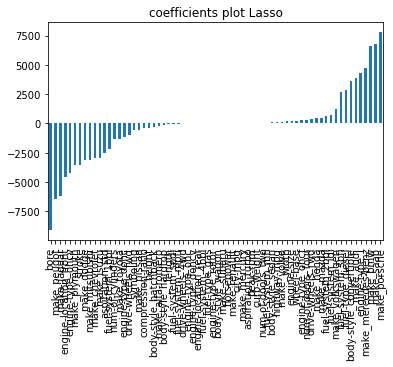

In [17]:
feature_col = X_train.columns
coef_val = pd.Series(model_lasso.coef_, feature_col).sort_values()
print(coef_val)

#Bar Coef Plot
coef_val.plot(kind='bar', title='coefficients plot Lasso')

#### Ridge Regression

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_data = pd.read_csv('Detail_Cars.csv')

df_data = df_data.replace('?',np.nan)

df_data.select_dtypes(include=['float','int'])

df_data['price'] = pd.to_numeric(df_data['price'], errors='coerce')
df_data['horsepower'] = pd.to_numeric(df_data['horsepower'], errors='coerce')
df_data['bore'] = pd.to_numeric(df_data['bore'], errors='coerce')
df_data['stroke'] = pd.to_numeric(df_data['stroke'], errors='coerce')
df_data['peak-rpm'] = pd.to_numeric(df_data['peak-rpm'], errors='coerce')

cylin_dict = {'two': 2, 'three': 3, 'four':4, 'five':5 , 'six':6, 'eight':8, 'twelve':12}

df_data['num-of-cylinders'].replace(cylin_dict, inplace=True)

df_data = df_data.drop('normalized-losses', axis=1)

df_data = pd.get_dummies(df_data)

df_data = df_data.dropna()


X = df_data.drop('price', axis=1)

y = df_data['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 0.5, normalize = True)
model_ridge.fit(X_train, y_train)
r_square_ridge = model_ridge.score(X_train, y_train)
print(r_square_ridge)

y_predict = model_ridge.predict(X_test)

0.9269306078889092


0.9215322460027141


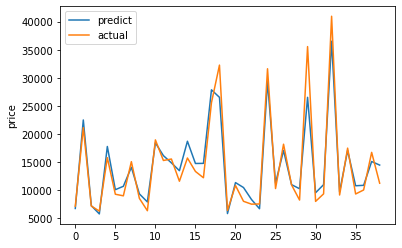

In [21]:
r_square_ridge = model_ridge.score(X_test, y_test)
print(r_square_ridge)

#Graph
plt.plot(y_predict, label='predict')
plt.plot(y_test.values, label='actual')
plt.ylabel('price')
plt.legend()
plt.show()

engine-location_front    -3919.992407
make_isuzu               -1747.799221
make_peugot              -1393.751458
make_mercury             -1339.684017
make_subaru              -1134.710485
                             ...     
body-style_convertible    2226.995273
make_porsche              3836.566842
engine-location_rear      3919.992407
make_bmw                  5188.333576
make_mercedes-benz        5438.343299
Length: 68, dtype: float64


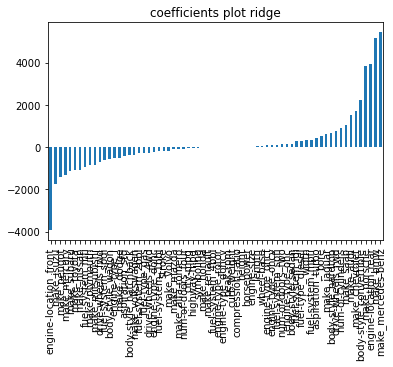

In [23]:
#For coefficients
feature_col = X_train.columns
coef_val = pd.Series(model_ridge.coef_, feature_col).sort_values()
print(coef_val)

coef_val.plot(kind='bar', title='coefficients plot ridge')

#### Bias and Variance
1.Goal of Supervised Alogith is have low bias and low variance

2.Linear models : High Bias and Low Variance

3.Non Linear Models : Low Bias and High Variance

4.Increasing the Bias ----> decrease the variance

5.Increasing the variance ----> decrease the bias

Total error = bias^2 + variance + Irreducible eror

Parameterization used to balance bias and variance